In [1]:
# Providing a prediction in a comment on whether the model is likely to have higher precision, higher recall, or similar precision and recall

# Based on the confusion matrix and scores, we can analyse which metric is higher.
# In this case, the model has achieved perfect performance:
# Confusion Matrix:
# [[10  0]
#  [ 0 20]]
# Accuracy: 1.0
# Precision: 1.0
# Recall: 1.0
# 
# This indicates that the model has perfectly balanced precision and recall, as there are no false positives or false negatives.
# Therefore, for this specific dataset and test set, the model has similar precision and recall.


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
iris_df = pd.read_csv('Iris.csv')

In [3]:
# Identify the independent variable X
X = iris_df.drop(columns=['Id', 'Species'])

In [4]:
# Encode the dependent variable y
# 'Iris-setosa' -> 0, 'Iris-versicolor' and 'Iris-virginica' -> 1
iris_df['Species'] = iris_df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)
y = iris_df['Species']

In [5]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

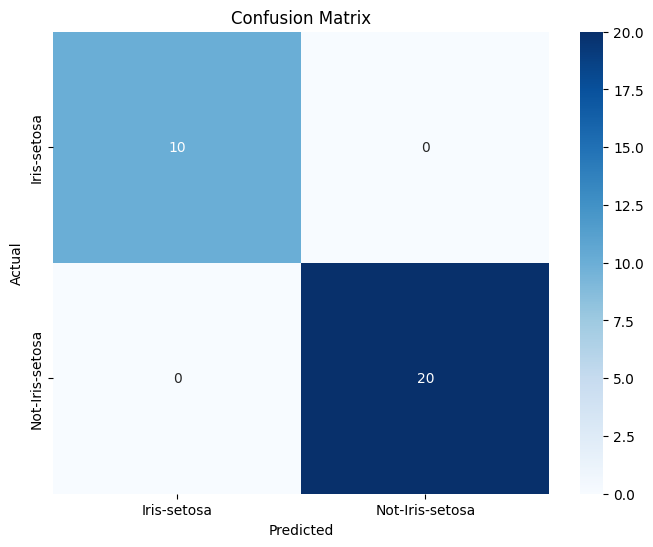

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Not-Iris-setosa'], yticklabels=['Iris-setosa', 'Not-Iris-setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Analyse the confusion matrix and provide prediction on model performance
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0]
 [ 0 20]]


In [11]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [12]:
# Perform cross-validation to ensure the model generalises well
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Cross-Validation Accuracy: {scores.mean()}")

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


In [13]:
# Model Interpretation: Print the coefficients
coefficients = model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))

         Feature  Coefficient
2  PetalLengthCm     2.215972
3   PetalWidthCm     0.928045
0  SepalLengthCm     0.428420
1   SepalWidthCm    -0.879875


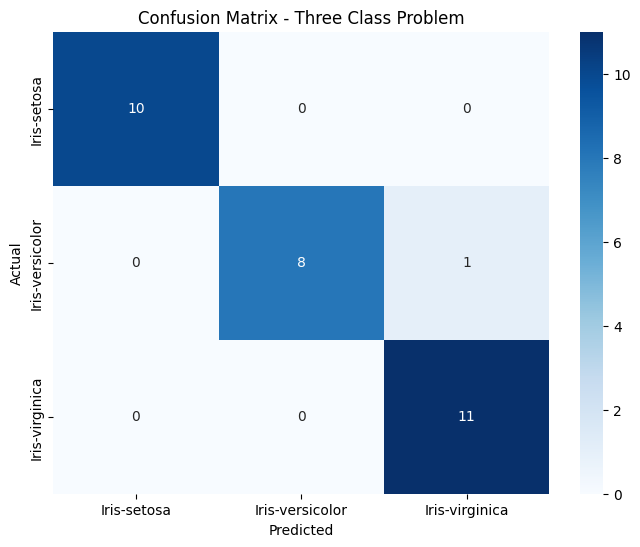

Confusion Matrix for the three-class problem:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [14]:
# Optional: Repeat the task for the three-class problem
# Encode the dependent variable y for three classes: 'Iris-setosa' -> 0, 'Iris-versicolor' -> 1, 'Iris-virginica' -> 2
iris_df = pd.read_csv('Iris.csv')
iris_df['Species'] = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y = iris_df['Species']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model for the three-class problem
model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Three Class Problem')
plt.show()

# Print out the confusion matrix
print("Confusion Matrix for the three-class problem:")
print(conf_matrix)